<a href="https://colab.research.google.com/github/benitez-mjv/Research-and-Development/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDOS SOBRE A COVID-19

#### Colaboradores *'Coloque o seu nome na lista'*
- Leandro Benitez
- Renato Rodrigues



TO DO´s 

- Criar um dataframe sumarizado com os dados
- Mapear uma fonte de dados que tenha latitude e longitude
- Criar um join dos dataframes para poder plotar um mapa com as métricas
- *Organizar o gráfico já existente em ordem ascendente por data* (done by Renato Rodrigues)

In [0]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Mapeando a fonte dos dados
url = 'https://raw.githubusercontent.com/belisards/coronabr/master/dados/corona_brasil.csv'

In [28]:
# Definindo o DataFrame
df = pd.read_csv(url, error_bad_lines=False)
df

,uid,date,time,suspects,refuses,confirmado,deads,local,cases,comments,broadcast,deaths,uf,Unnamed: 13,Unnamed: 14
0,11,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,0,RO,NaN,NaN
1,12,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,0,AC,NaN,NaN
2,13,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,0,AM,NaN,NaN
3,14,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,0,RR,NaN,NaN
4,15,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,0,PA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,33,2020-01-30,16:00,1.0,0.0,0.0,0.0,0,0,0,0,0,RJ,NaN,NaN
815,35,2020-01-30,16:00,3.0,1.0,0.0,0.0,0,0,0,0,0,SP,NaN,NaN
816,41,2020-01-30,16:00,1.0,1.0,0.0,0.0,0,0,0,0,0,PR,NaN,NaN
817,42,2020-01-30,16:00,0.0,2.0,0.0,0.0,0,0,0,0,0,SC,NaN,NaN


In [29]:
# Agrupando por Data e UF
df_group = df.groupby(['date','uf']).sum()
df_group

uid  suspects  refuses  confirmado  deads  cases  deaths
date       uf                                                          
2020-01-30 CE   23       1.0      0.0         0.0    0.0      0       0
           MG   31       1.0      0.0         0.0    0.0      0       0
           PR   41       1.0      1.0         0.0    0.0      0       0
           RJ   33       1.0      0.0         0.0    0.0      0       0
           RS   43       2.0      2.0         0.0    0.0      0       0
...            ...       ...      ...         ...    ...    ...     ...
2020-03-23 RS   43       0.0      0.0         0.0    0.0     86       0
           SC   42       0.0      0.0         0.0    0.0     68       0
           SE   28       0.0      0.0         0.0    0.0     10       0
           SP   35       0.0      0.0         0.0    0.0    745      30
           TO   17       0.0      0.0         0.0    0.0      5       0

[804 rows x 7 columns]

In [30]:
df = df.sort_values('date')
df

,uid,date,time,suspects,refuses,confirmado,deads,local,cases,comments,broadcast,deaths,uf,Unnamed: 13,Unnamed: 14
818,43,2020-01-30,16:00,2.0,2.0,0.0,0.0,0,0,0,0,0,RS,NaN,NaN
812,23,2020-01-30,16:00,1.0,0.0,0.0,0.0,0,0,0,0,0,CE,NaN,NaN
813,31,2020-01-30,16:00,1.0,0.0,0.0,0.0,0,0,0,0,0,MG,NaN,NaN
817,42,2020-01-30,16:00,0.0,2.0,0.0,0.0,0,0,0,0,0,SC,NaN,NaN
815,35,2020-01-30,16:00,3.0,1.0,0.0,0.0,0,0,0,0,0,SP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,51,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,0,MT,NaN,NaN
25,52,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,0,GO,NaN,NaN
26,53,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,133,NaN,NaN,0,DF,NaN,-
13,27,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,0,AL,NaN,NaN


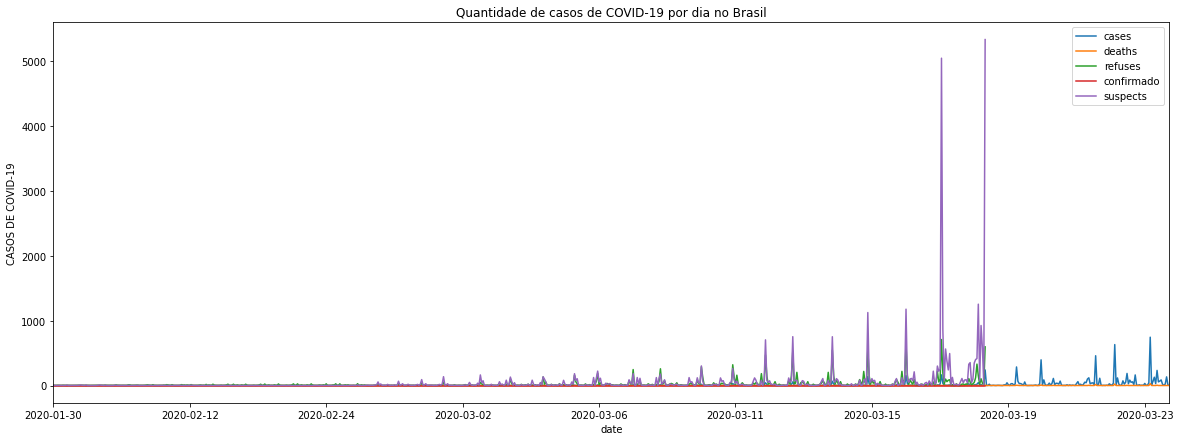

In [31]:
# Configurando o tamanho do gráfico
plt.rcParams['figure.figsize'] = (20,7)

# Adicionando o título 
plt.title('Quantidade de casos de COVID-19 por dia no Brasil')

# Alterando nomes dos eixos
plt.xlabel('DATA')
plt.ylabel('CASOS DE COVID-19')

# Defininndo Dados
ax = plt.gca()
df.plot(kind='line', x='date', y='cases', ax=ax)
df.plot(kind='line', x='date', y='deaths', ax=ax)
df.plot(kind='line', x='date', y='refuses', ax=ax)
df.plot(kind='line', x='date', y='confirmado', ax=ax)
df.plot(kind='line', x='date', y='suspects', ax=ax)
